<a href="https://colab.research.google.com/github/rahul-727/DL-Lab-work/blob/main/2348544_CIA_component2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np

def cf(s, d):
    return 0.1 * s**2 + 0.5 * d

def t(s, d):
    return d / s + 0.1 * d

def cost(s, d):
    return cf(s, d) + t(s, d)

def added_cost_s(s, d):
    return 0.2 * s - (d / (s*2))

def added_cost_d(s, d):
    return 0.5 + 0.1 - s + 0.1

def stochastic_gradient(s, d, lr, momentum, iterations):
    x= 0
    x_new = x

    for i in range(iterations):

        grad_s = added_cost_s(s, d)
        grad_d = added_cost_d(s, d)

        x =  momentum * grad_s
        x_new = momentum * grad_d

        s += lr * x
        d += lr * x_new

        print(f"Speed = {s}, Distance = {d}, Cost = {cost(s, d)}")

    return s, d

initial_speed = 50.0
initial_distance = 100.0
learning_rate = 0.01
momentum = 0.9
iterations = 3

optimized_speed, optimized_distance = stochastic_gradient(initial_speed, initial_distance, learning_rate, momentum, iterations)


Speed = 50.081, Distance = 99.5563, Cost = 312.5323416929395
Speed = 50.16220022483178, Distance = 99.111871, Cost = 313.06758356526035
Speed = 50.243600960021055, Distance = 98.66671119797651, Cost = 313.60573717658855


In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [24]:
df = pd.read_csv('/content/GME_stock.csv')
df.head(5)

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002


In [26]:
df.isnull().sum()

date              0
open_price        0
high_price        0
low_price         0
close_price       0
volume            0
adjclose_price    0
dtype: int64

In [41]:
columns = ['open_price', 'high_price', 'low_price', 'close_price', 'volume']
x = df[columns]
y = df['adjclose_price']

In [42]:
scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(x)
y = y.values.reshape(-1,1)
scaled_y = scaler.fit_transform(y)

# splitting data into train and test

In [30]:
X_train, X_test, y_train, y_test = train_test_split(scaled_x, scaled_y, test_size=0.2, random_state=42)

Epoch 1/50
120/120 [==============================] - 2s 4ms/step - loss: 0.0470 - val_loss: 0.0017
Epoch 2/50
120/120 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0016
Epoch 3/50
120/120 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 4/50
120/120 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 3.8569e-04
Epoch 5/50
120/120 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 2.6451e-04
Epoch 6/50
120/120 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 1.9328e-04
Epoch 7/50
120/120 [==============================] - 0s 3ms/step - loss: 9.3904e-04 - val_loss: 4.1141e-04
Epoch 8/50
120/120 [==============================] - 0s 3ms/step - loss: 7.1066e-04 - val_loss: 1.2527e-04
Epoch 9/50
120/120 [==============================] - 0s 3ms/step - loss: 6.1434e-04 - val_loss: 1.1258e-04
Epoch 10/50
120/120 [==============================] - 0s 3ms/st

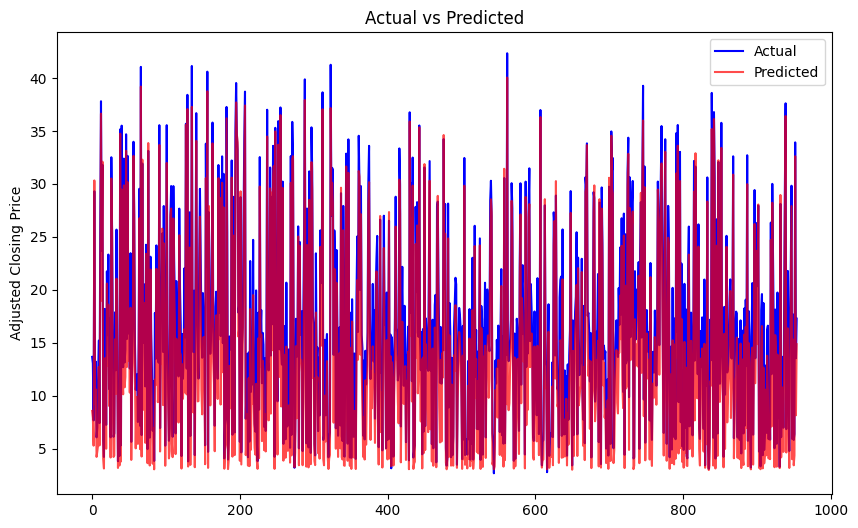

In [35]:
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1],),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test)
comparison_df = pd.DataFrame({'Actual': y_test_actual.flatten(), 'Predicted': y_pred.flatten()})
print(comparison_df.head())

plt.figure(figsize=(10,6))
plt.plot(y_test_actual.flatten(), label='Actual', color='blue')
plt.plot(y_pred.flatten(), label='Predicted', color='red', alpha=0.7)
plt.title('Actual vs Predicted')
plt.ylabel('Adjusted Closing Price')
plt.legend()
plt.show()
